In [1]:
import lightkurve as lk
from lightkurve import search_targetpixelfile
import matplotlib.pyplot as plt
from pylab import *
tpf = search_targetpixelfile('212136544', mission='K2', campaign= 18).download()

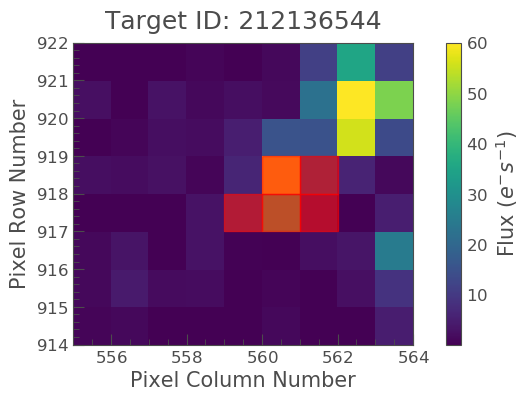

In [2]:
%matplotlib inline
tpf.plot(aperture_mask=tpf.pipeline_mask, mask_color='red')

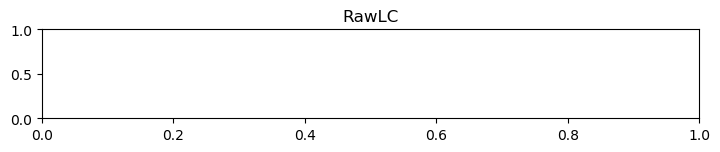

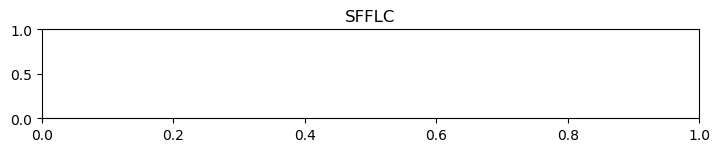

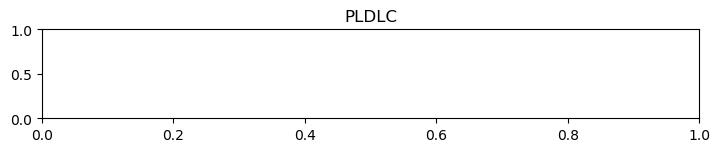

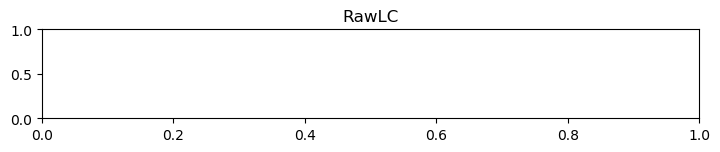

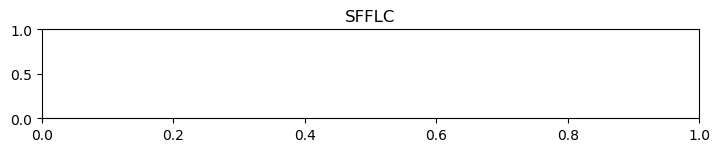

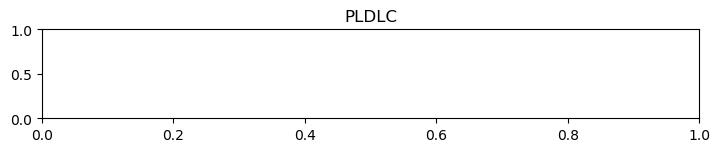

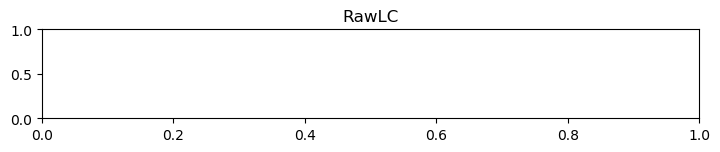

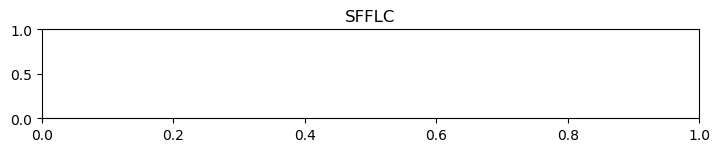

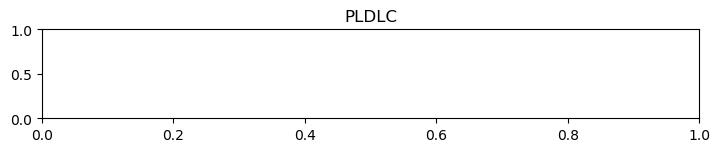

In [9]:
  #first plot
    
     user_lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask.astype(bool))
     # Clean the light curve
     user_lc = user_lc.remove_nans().remove_outliers()
     user_lc.plot(marker='o',linestyle='None',markersize=4,color='blue')
     plt.ylim(0.9,1.1)
     plt.subplot(3,1,1)
     plt.title('RawLC')
     
     #SFF corrector
     #second plot
     
     corrector = lk.correctors.SFFCorrector(user_lc)
     new_lc_sff = corrector.correct(user_lc.centroid_col,user_lc.centroid_row)
     new_lc_sff.plot()
     plt.subplot(3,1,2)
     plt.title('SFFLC')
     
     #PLD Corrector
     #third plot 
     
     corrector = lk.PLDCorrector(tpf) # doctest: +SKIP
     new_lc_pld = corrector.correct() # doctest: +SKIP
     new_lc_pld.plot()
     plt.subplot(3,1,3)
     plt.title('PLDLC')
    
     plt.show()

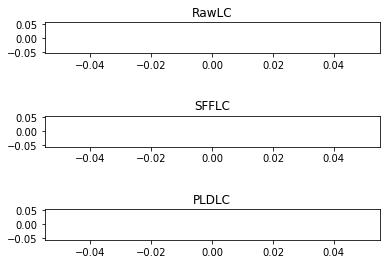

In [6]:
f, (user_lc,new_lc_sff,new_lc_pld)= plt.subplots(3)
user_lc.plot(marker='o',linestyle='None',markersize=4,color='blue')
user_lc.set_title('RawLC')
new_lc_sff.plot()
new_lc_sff.set_title('SFFLC')
new_lc_pld.plot()
new_lc_pld.set_title('PLDLC')
f.subplots_adjust(hspace=2)